# Project: Investigate the Titanic Dataset

## Introduction

This is a course project of Udacity Data Analyst Nanodegree. The Dataset being used here is the Titanic Data, and the description of this dataset can be found on [the Kaggle website](https://www.kaggle.com/c/titanic/data).

## Dataset Description

### Data Dictionary

The Data Dictionary of this dataset is shown in the below table:

| **Variable** | **Definition** | **Key** |
| --- | --- | --- |
| survival | Survival | 0 = No, 1 = Yes |
| pclass | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd |
| sex | Sex |  |
| Age | Age in years |  |
| sibsp | # of siblings / spouses aboard the Titanic |  |
| parch | # of parents / children aboard the Titanic |  |
| ticket | Ticket number |  |
| fare | Passenger fare |  |
| cabin | Cabin number |  |
| embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton |

### Variable Notes

#### pclass

*A proxy for socio-economic status (SES)*

- 1st = Upper
- 2nd = Middle
- 3rd = Lower

#### age

*Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5*

#### sibsp

*The dataset defines family relations in this way...*

- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife (mistresses and fiancés were ignored)

#### parch

*The dataset defines family relations in this way...*

- Parent = mother, father
- Child = daughter, son, stepdaughter, stepson
- Some children travelled only with a nanny, therefore parch=0 for them.

> **Reference:** Both the description of **Data Dictionary** and **Variable Notes** are copied from the [kaggle website](https://www.kaggle.com/c/titanic/data) for convenience.

## Step 1: Purpose and Questions

For any data analysis project, maybe the first and the most important step is make the purpose very clear and ask one or more good questions, then you can use the dataset and the techniques of data science to answer the questions. If the purpose and the questions are unclear, then it may be unlikely to discover valuable insights.

Both the purpose and the questions are somewhat simple and clear in this project because the most important thing that we care is about the survival. So there are two questions that I want to find the answers through this analysis:

1. What's the overall survived rate in this accident?

1. What factors made people more likely to survive?

## Step 2: Setup and Load Dataset

Before the analysis begins, we need import all necessary packages and functions to setup the environment, and load the dataset:

In [29]:
# import all necessary packages and functions.
from datetime import datetime
import numpy as np
%precision 3
import pandas as pd
from scipy.stats import fisher_exact, chi2_contingency
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams["figure.figsize"] = (8, 5)
import seaborn as sns

In [2]:
# load dataset
dat = pd.read_csv('data/titanic-data.csv')
dat.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Step 3: Analyse the columns of this dataset

There are 12 columns in this dataset and we can divide them into three categories:

- Dependent variable: In this project, the column `Survived` represents the Dependent variable;

- Features may have relationship with the dependent variable: these are the features that may affect whether a specific passenger would survive or not, including: `Pclass`, `Sex`, `Age`, `SibSp`, `Parch`, `Fare`;

- Features may not have relationship with the dependent variable: these are the properties of the passenger and are unlikely have effect on the dependent variable, including: `PassengerId`, `Name`, `Ticket`, `Cabin`, `Embarked`

## Step 4: Answer the Questions

### Question 1: What's the overall survived rate of this accident?

This is a very simple question and the reason to ask it is just because I want to know whether there were more than a half of passengers survived. Unfortunately, the answer is no.

We can use the code below to calculate the overall survival rate:

In [3]:
dat['Survived'].mean()

0.384

The result shows that the overall survival rate is about 38%, which means about 62% of the passengers were not survived in this disaster.

We can also use the histogram to show the overall survival rate:

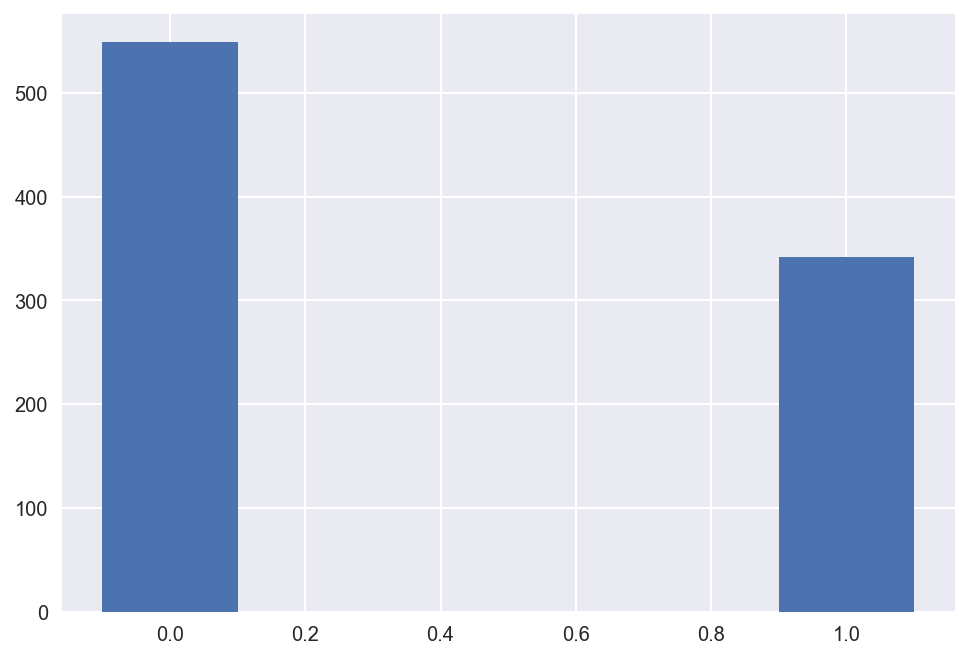

In [4]:
dat['Survived'].hist(bins = 2, range = (-0.5,1.5), rwidth = 0.2)

### Question 2: What factors made people more likely to survive?

From "Step 3: Analyse the columns of this dataset", we know that there are six factors may affect whether a specific passenger would survive or not, so in order to answer this question, the first thing we need to do is exploring the relationship between these factors and the dependent variable `Survived`.

Among these six factors, `Pclass` and `Sex` are categorial variables, `Age`, `SibSp`, `Parch`, and `Fare` are numeric variables.

Because the dependent variable in this project is a Dummy Variable, we can't simply calculate the correlation coefficient to test the relationship, instead:

- In order to explore the relationship between a dummy variable and a categorial variable, we need creat a cross table and conduct the Chi-square test to test the independence between the two varibales;

- In order to explore the relationship between a dummy variable and a numeric variable, we need use the boxplot the visualize the relationship between the two variables.

#### Analyse the Categorial Variables

First we need create the cross table with `Survived` for `Sex` and `Pclass`, then we can use the cross table to conduct the Chi-square test.

In addition, we can use the barplot to visualize the relationship between the variables.

##### Chi-square test for `Sex` and `Pclass`

Before we conduct the Chi-square test, we can define a function to combine the calculate of cross table and the Chi-square test to make the code more clear and reusable:

In [5]:
def chi2_test(col_1, col_2):
    cross_table = pd.crosstab(dat[col_1], dat[col_2])
    print("Cross Table between {0} and {1}:".format(col_1, col_2))
    display(cross_table)
    print("Chi-square test between {0} and {1}:\n".format(col_1, col_2))
    chi2_result = chi2_contingency(cross_table)
    print("Test Statistic: {}\np-value: {}\n".format(round(chi2_result[0], 6), chi2_result[1]))

The result of Chi-square test for Survived and Sex is:

In [6]:
chi2_test('Survived', 'Sex')

Cross Table between Survived and Sex:


Sex,female,male
Survived,,
0,81,468
1,233,109


Chi-square test between Survived and Sex:

Test Statistic: 260.71702
p-value: 1.1973570627755645e-58



The result of Chi-square test for Survived and Pclass is:

In [7]:
chi2_test('Survived', 'Pclass')

Cross Table between Survived and Pclass:


Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


Chi-square test between Survived and Pclass:

Test Statistic: 102.888989
p-value: 4.549251711298793e-23



From the results of Chi-square test, it is clearly that `Sex` and `Pclass` have statistically significant effects on `Survived`.

##### Barplot for `Sex` and `Pclass`

In [8]:
# define a function to show the barplot for Sex and Pclass
def bar_plot(col_1, col_2):
    pd.crosstab(dat[col_1], dat[col_2]).plot(kind = "bar")

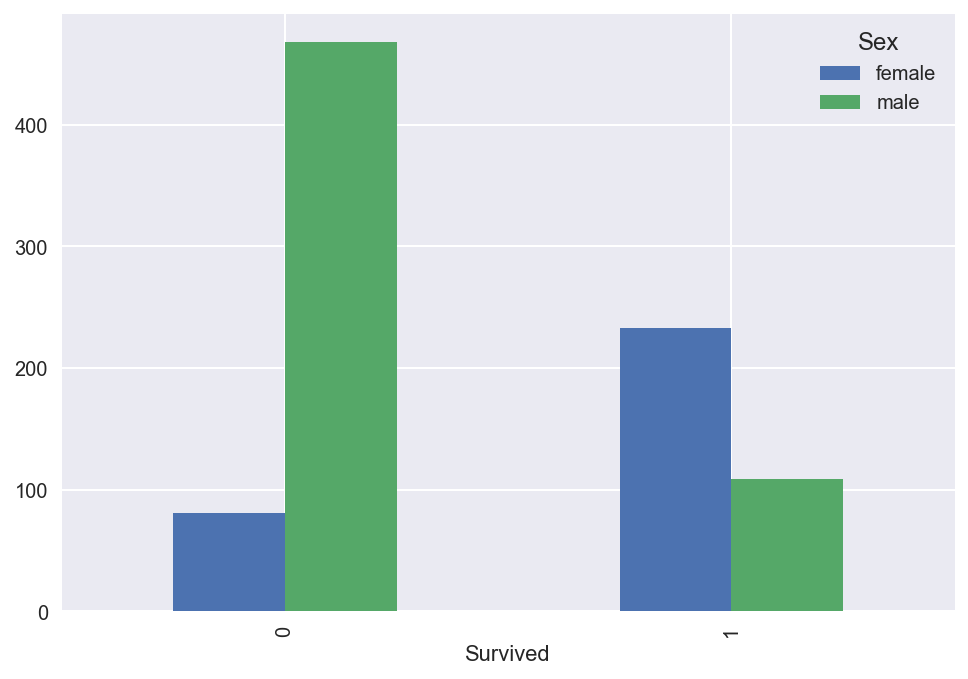

In [9]:
bar_plot("Survived", "Sex")

From the above barplot, we can see that:

- For the male, the number of survived passengers was less than one quarter of the number of unsurvived passengers;

- For the female, the number of survived passengers was more than twice the number of unsurvived passengers.

In short, female passangers were more likely to survive than male passangers.

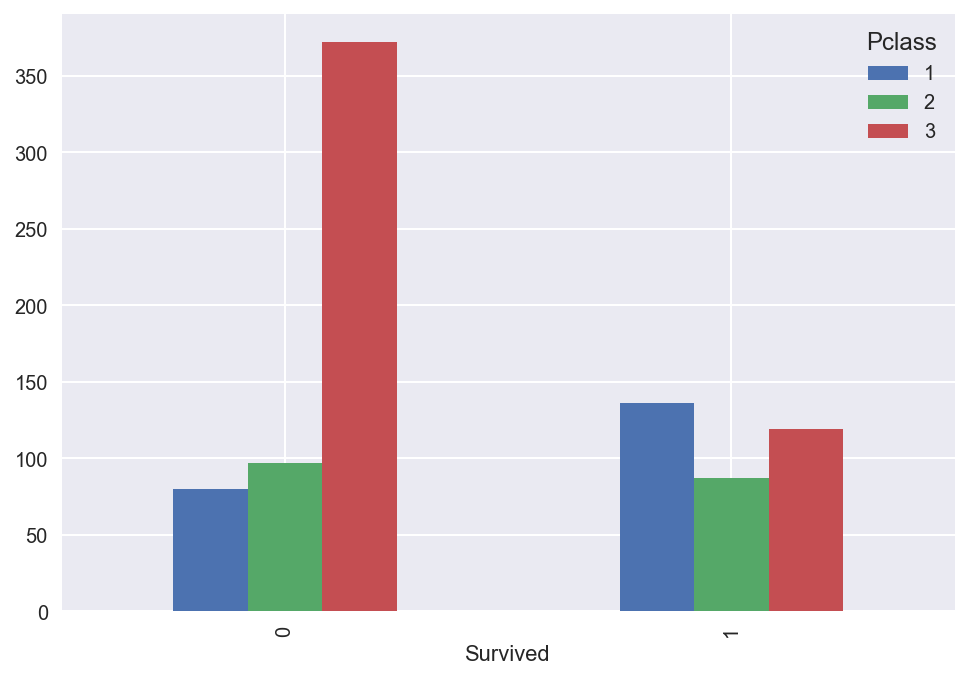

In [10]:
bar_plot("Survived", "Pclass")

From the above barplot, we can see that:

- 1st Class passangers were more likely to be survived;

- 3rd Class passangers were more likely to be not survived;

- 2nd Class passangers were in between.

In short, passangers with higher socio-economic status (SES) were more likely to survive.

#### Analyse the Numeric Variables

Now it's the time to explore the relationship between `Survived` and the numeric variables. In order to do this, we may use the boxplot, however, after plotted the boxplot, I found that it's hard to make conclusion from the boxplot since the difference between the survived group and the unsurvived group is not obvious. So I use the violinplot instead because it can convey more information than boxplot.

##### Violinplot of `Survived` and `Age`

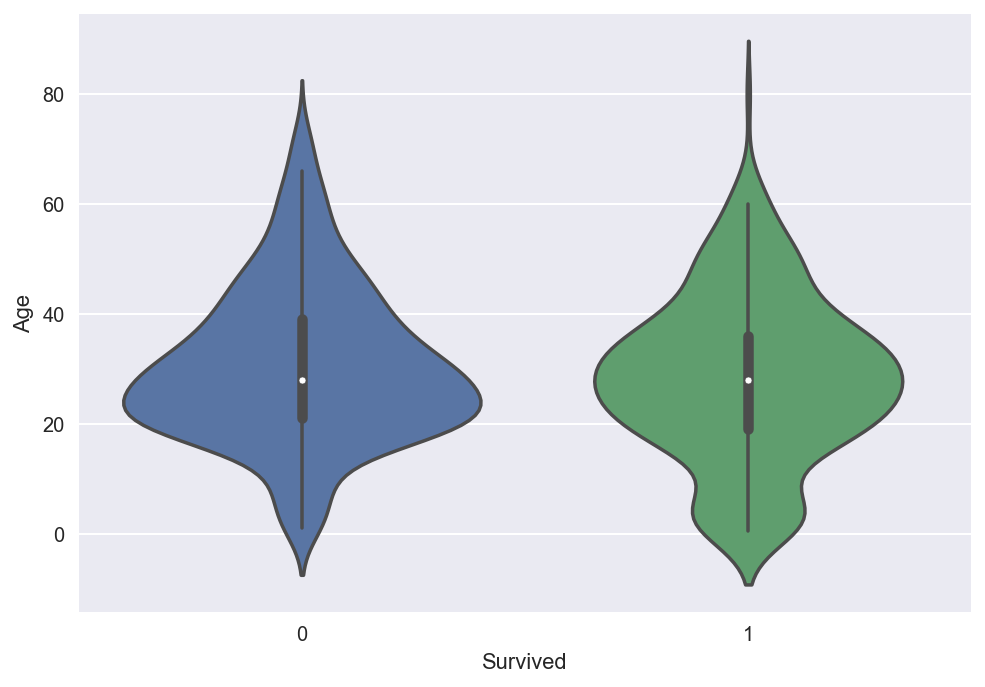

In [11]:
sns.violinplot("Survived", "Age", data = dat)

The bottom part of the above violinplot shows that passangers who are younger than 10 were more likely to be survived, however, the difference is not very clear in this figure. So we are not able to make a confident conclusion here. More advanced analysis need to be conducted such as ANOVA in order to confirm the relationship between these two variables.

##### Violinplot and barplot of `Survived` and `SibSp`

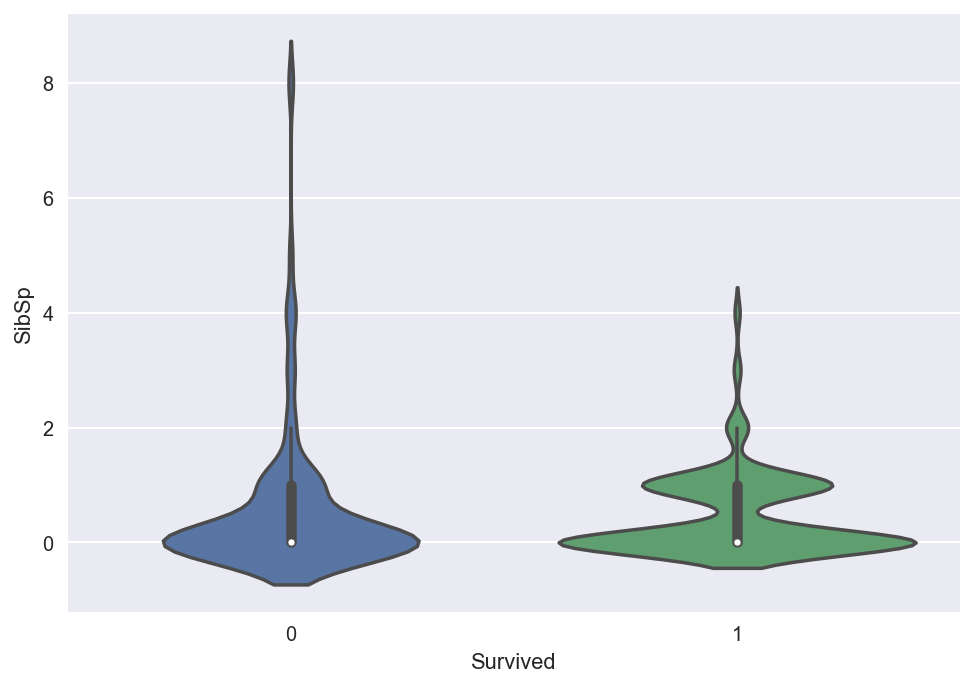

In [12]:
sns.violinplot("Survived", "SibSp", data = dat)

From the above violinplot, we can see that passangers whose SibSp was more than 4 would be not survived. However, even though there is obvious visual difference between survived group and unsurvived group, it's hard to make conclusion. Since the unique values of the `SibSp` column are [0, 1, 2, 3, 4, 5, 8], it will be clear if we treat `SibSp` as categorial variable and use the bar plot:

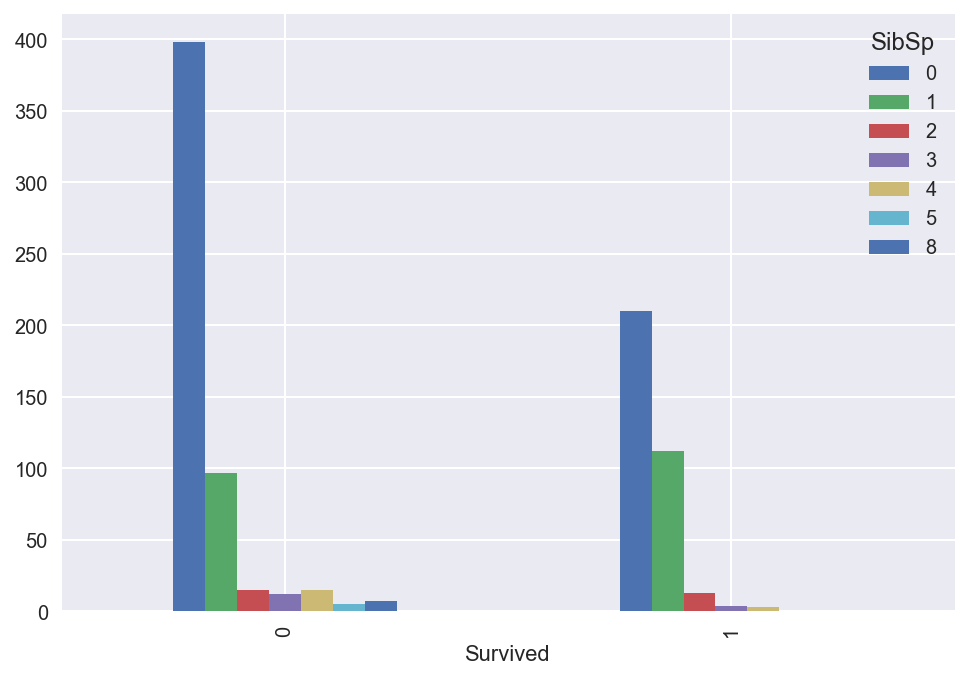

In [13]:
bar_plot("Survived", "SibSp")

From the above bar plot, it seems like there is not obvious relationship between `Survived` and `SibSp` when `SibSp` is lower than 4, while there is some differnence exist when `SibSp` is greater than 4.

##### Violinplot and barplot of `Survived` and `Parch`

Similarly, we can treat `Parch` as categorial variable since it has only seven unique values: [0, 1, 2, 3, 4, 5, 6].

Below are the violinplot and the bar plot:

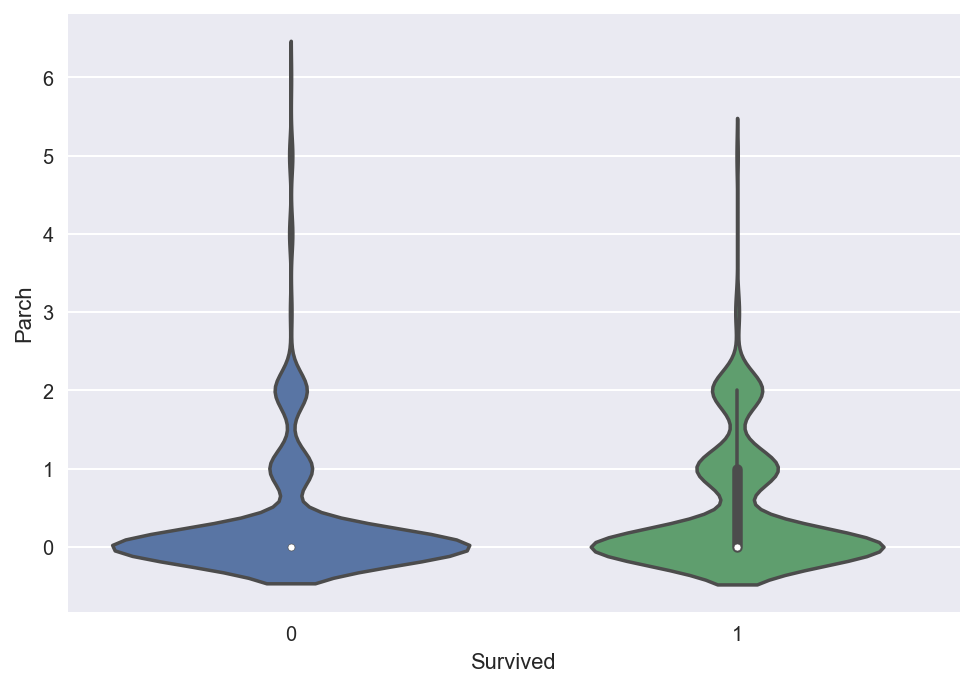

In [14]:
sns.violinplot("Survived", "Parch", data = dat)

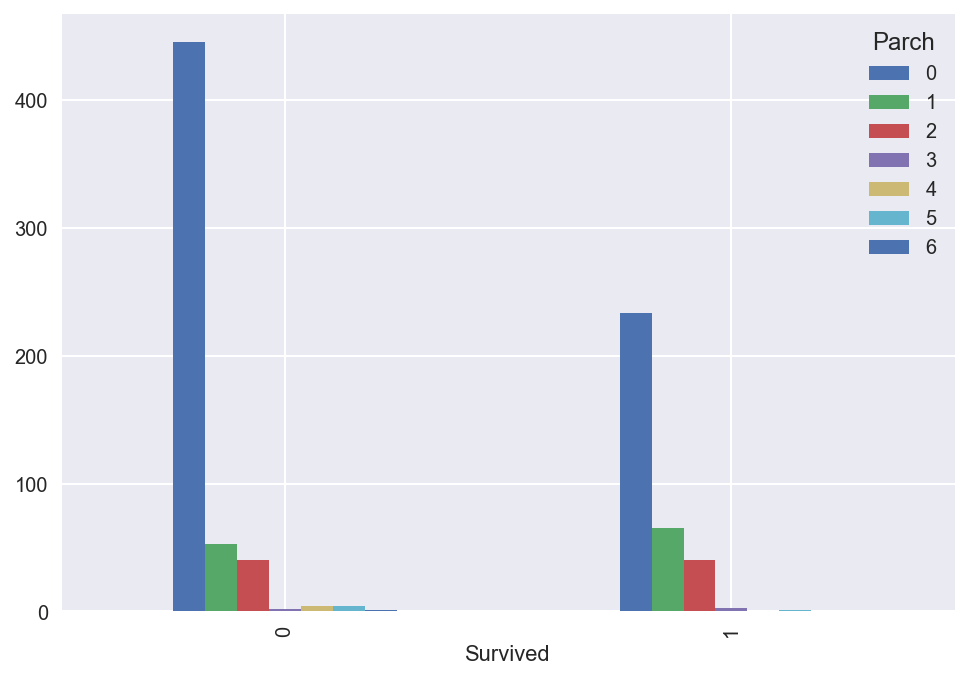

In [15]:
bar_plot("Survived", "Parch")

From the above violinplot and barplot it's hard to say whether there is relationship between `Survived` and `Parch`.

##### Violinplot of `Survived` and `Fare`

Now let's take a look at the violinplot of `Survived` and `Fare`:

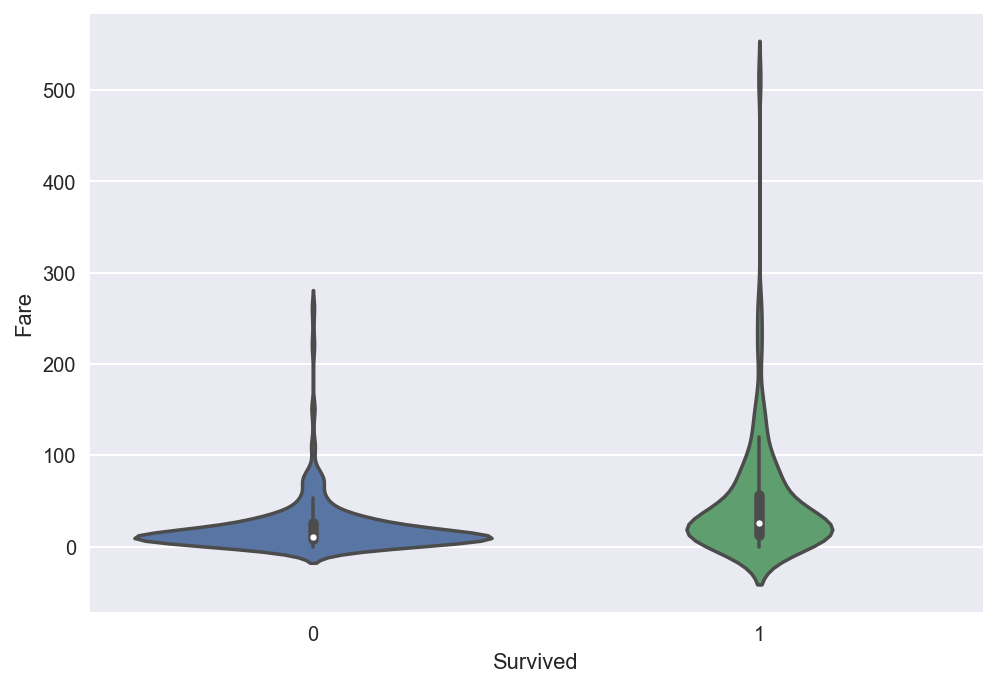

In [16]:
sns.violinplot("Survived", "Fare", data = dat)

From the above violinplot, we can see clearly passangers who paid higher fare were more likely to be survived, and passangers who paid lower fare were less likely to be survived.

In addition, feature `Fare` and feature `Pclass` should have some relationship between them, which can be shown in the below figure:

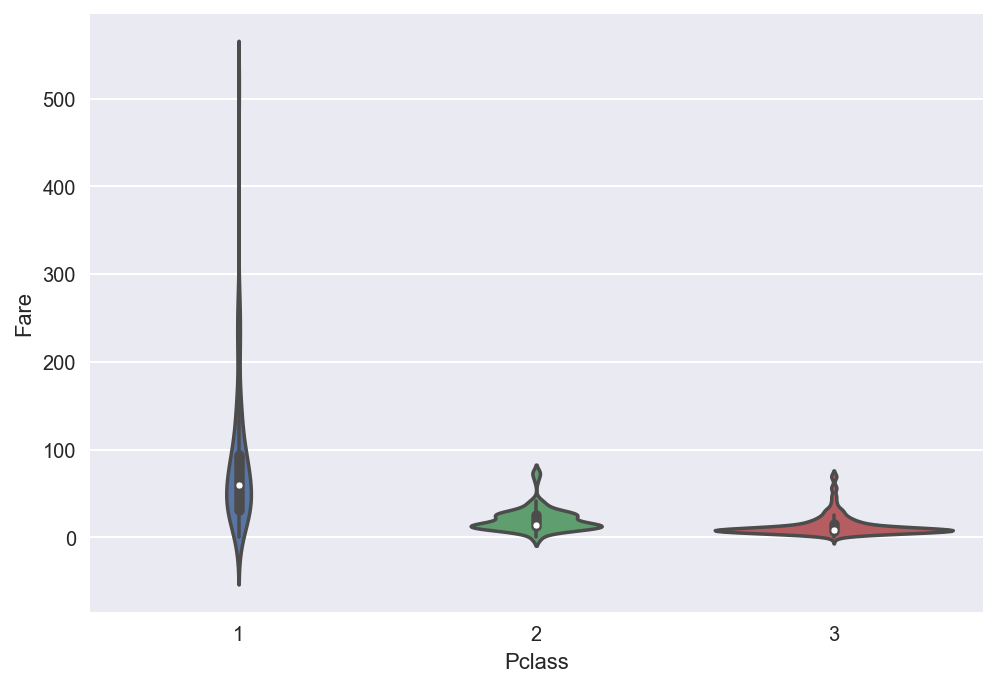

In [17]:
sns.violinplot("Pclass", "Fare", data = dat)

#### Logistic Regression

After the exploratory analysis of the features, it is time to build a model to check whether we can use a set of features to predict the dependent variable (e.g. `Survived`). Since `Survived` is a dummy variable, we can use the Logistic Regression Model.

##### Prepare the Dataset

###### Remove missing values

Before building the model, we should prepare the dataset, and the first step is checking the missing values: 

In [18]:
dat.isnull().describe()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891,891,891,891,891,891,891,891,891,891,891,891
unique,1,1,1,1,1,2,1,1,1,1,2,2
top,False,False,False,False,False,False,False,False,False,False,True,False
freq,891,891,891,891,891,714,891,891,891,891,687,889


We can see that there are missing value in `Age`, `Cabin`, and `Embarked`, and the number of missing value in `Cabin` is as high as 687! Since `Cabin` and `Embarked` will not be used as features, we can simple drop these two columns. For the `Age` feature, we will remove the rows which have missing values:

In [19]:
dat_model = dat.drop(['Cabin', 'Embarked'], axis = 1).dropna()
display(dat_model.shape)

(714, 10)

After dealing with the missing values, there are 714 row remained.

###### Dummy variables

The second step is generating dummy variables from categorial variables `Sex` and `Pclass`:

In [20]:
sex_dummies = pd.get_dummies(dat_model['Sex'])
pclass_dummies = pd.get_dummies(dat_model['Pclass'])
display(sex_dummies.head(), pclass_dummies.head())

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


,1,2,3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


We can creat a function to build models using different feature groups in order to easily compare them:

In [21]:
def logistic_model(X, y):
    lr_model = LogisticRegression()
    lr_model.fit(X, y)
    print("Coefficients of model:\n")
    for coef in list(zip(X.columns, lr_model.coef_[0])):
        print("  ", " : ".join([str(s) for s in coef]))
    
    print("\nThe score of this model is {0}".format(lr_model.score(X, y)))

The dependent variable of this project is `Survived`:

In [22]:
y = dat_model['Survived']

Here I will create three different models to compare:

- Model 1: Using all relevant features including: `Pclass`, `Sex`, `Age`, `SibSp`, `Parch`, `Fare`;

- Model 2: Using only two features: `Sex` and `Pclass`;

- Model 3: Using only one feature: `Sex`.

> Note: The feature selection of Model 2 and Model 3 is based on the result of Model 1 (by examine the coefficient of each feature), I list them here just for clarity.

##### Model 1

In [23]:
X1 = pd.concat([dat_model[['Age', 'SibSp', 'Parch', 'Fare']], sex_dummies, pclass_dummies], axis=1)
display(X1.head(2))
logistic_model(X1, y)

,Age,SibSp,Parch,Fare,female,male,1,2,3
0,22.0,1,0,7.2500,0,1,0,0,1
1,38.0,1,0,71.2833,1,0,1,0,0


Coefficients of model:

   Age : -0.0405678330728
   SibSp : -0.353431857304
   Parch : -0.0596617910741
   Fare : 0.00278672377788
   female : 1.66046358434
   male : -0.884780410891
   1 : 1.41118208642
   2 : 0.256292892151
   3 : -0.891791805126

The score of this model is 0.8025210084033614


##### Model 2

In [24]:
X2 = pd.concat([sex_dummies, pclass_dummies], axis = 1)
display(X2.head(2))
logistic_model(X2, y)

,female,male,1,2,3
0,0,1,0,0,1
1,1,0,1,0,0


Coefficients of model:

   female : 1.27361147301
   male : -1.23575210855
   1 : 0.943911720775
   2 : 0.0563993754886
   3 : -0.962451731804

The score of this model is 0.7801120448179272


##### Model 3

In [25]:
X3 = pd.concat([sex_dummies], axis = 1)
display(X3.head(2))
logistic_model(X3, y)

,female,male
0,0,1
1,1,0


Coefficients of model:

   female : 1.17889499459
   male : -1.25772533511

The score of this model is 0.7801120448179272


We can see the score of Model 1 is slightly higher than Model 2 and Model 3, and **the score of Model 2 and Model 3 is just exactly equal. I'm not sure whether this is just coincidence or there is some reason for this. I have checked the code carefully and have not found any error.**

The in-sample accuracy score can only represent the explanatory ability of the model, in order to check the predictive ability of the model, we need conduct the out-sample test. 

Here we use the 5-folds cross-validation:

##### Cross-validation of Model 1

In [26]:
cross_val_score(LogisticRegression(), X1, y, cv = 5).mean()

0.787

##### Cross-validation of Model 2

In [27]:
cross_val_score(LogisticRegression(), X2, y, cv = 5).mean()

0.780

##### Cross-validation of Model 3

In [28]:
cross_val_score(LogisticRegression(), X3, y, cv = 5).mean()

0.780

Again, the results of cross-validation show that the score of Model 1 is just a little higher than Model 2 and Model 3, **and the cross-validation scores of Model 2 and Model 3 are still exactly equal.**  *Wish I could know the reason of this.*

## Step 5: Conclusion

From the analysis above, the main conclusion is that variable `Sex` is the most important factor, female passengers is more likely to be survived than male passengers. The other feature such as `Age`, `Pclass` may provide some information to predict the dependent variable `Survived`, but only very slightly, so maybe it's reasonable to ignore them from the model.

## Step 6: Future Works

This work is just a conventional data analysis for this dataset, if we want to be full of confidence with the conclusion, more statistical tests will need to be done, also we should access and understand the details of this accident, such as the rescue guidelines of this accident.